# Chapter 7 Random Field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy

In [34]:
# BCCB
def Circulant_Sample_2d(C_red, n1, n2):
    N = n1 * n2
    Lam = N * np.fft.ifft2(C_red)
    d = np.ravel(np.real(Lam))
    d_minus = np.maximum(- d, 0)
    if np.max(d_minus > 0):
        print(f'rho(D_minus)={np.max(d_minus)}')
    np.random.seed(24)
    xi=np.random.randn(n1,n2) + 1j*np.random.randn(n1,n2)
    V=(Lam ** 0.5)*xi
    Z = np.fft.fft2(V) / sqrt(N)
    X=np.real(Z);    Y=np.imag(Z)
    return X, Y

def Reduced_Cov(n1, n2, dx1, dx2, c):
    C_red = np.zeros((2*n1 - 1, 2*n2 - 1))
    for i in range(2*n1 - 1):
        for j in range(2*n2 - 1):
            C_red[i, j] = c((i+1-n1)*dx1, (j+1-n2)*dx2)
    return C_red

def Circulant_Embed_Sample_2d(C_red, n1, n2):
    N = n1 * n2
    tilde_C_red = np.zeros((2 * n1, 2 * n2))
    tilde_C_red[1:2*n1, 1:2*n2] = C_red
    tilde_C_red = np.fft.fftshift(tilde_C_red)
    u1, u2 = Circulant_Sample_2d(tilde_C_red, 2*n1, 2*n2)
    u1 = np.ravel(u1);  u2=np.ravel(u2)
    u1 = u1[0:2*N]; u1 = u1.reshape((n1,2 * n2)); u1 = u1[:,::2]
    u2 = u2[0:2*N]; u2 = u2.reshape((n1,2 * n2)); u2 = u2[:,::2]
    return u1, u2

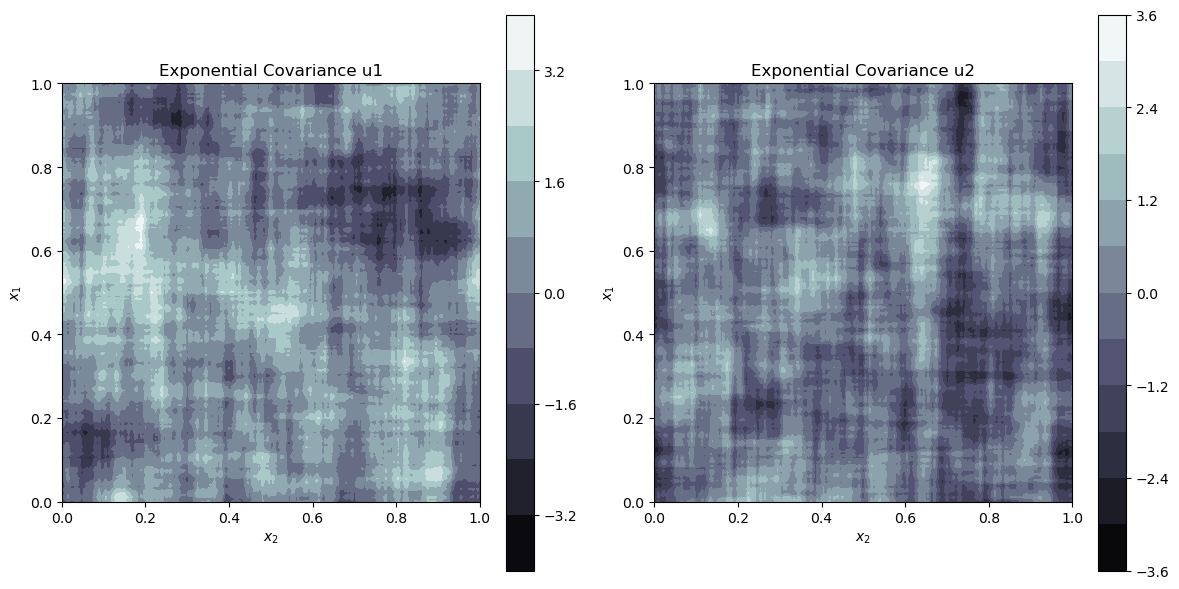

In [35]:
def sep_exp(x1,x2,ell_1,ell_2):
    c=exp(- abs(x1) / ell_1 - abs(x2) / ell_2)
    return c

#
n1 = 201; n2 = 201
x=np.linspace(0, 1, n1)
y=np.linspace(0, 1, n2)
#
fhandle1=lambda x1,x2:sep_exp(x1, x2, 1/5, 1/5)
C_red = Reduced_Cov(n1, n2, 1/200, 1/200, fhandle1)
u1, u2 = Circulant_Embed_Sample_2d(C_red, n1, n2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# 绘制 u1 的等高线图
CS1 = ax1.contourf(y, x, u1, 10, cmap=plt.cm.bone)
ax1.set_aspect('equal')  # 设置坐标轴等比例
ax1.set_xlabel(r'$x_2$')
ax1.set_ylabel(r'$x_1$')
ax1.set_title(r'Exponential Covariance u1')
plt.colorbar(CS1, ax=ax1)


# 绘制 u2 的等高线图
CS2 = ax2.contourf(y, x, u2, 10, cmap=plt.cm.bone)
ax2.set_aspect('equal')  # 设置坐标轴等比例
ax2.set_xlabel(r'$x_2$')
ax2.set_ylabel(r'$x_1$')
ax2.set_title(r'Exponential Covariance u2')
plt.colorbar(CS2, ax=ax2)

# 调整布局，防止重叠
plt.tight_layout()

# 显示图像
plt.show()

In [ ]:
def Circulant_Embed_Approx_2d(C_red,n1,n2,m1,m2):
    nn1 = n1 + m1;    nn2 = n2 + m2
    N=nn1 * nn2
    tilde_C_red=np.zeros((2 * nn1,2 * nn2))
    tilde_C_red[1:2 * nn1,1:2 * nn2]=C_red
    tilde_C_red=np.fft.fftshift(tilde_C_red)
    u1,u2=Circulant_Sample_2d(tilde_C_red, 2 * nn1, 2 * nn2)
    # print(u1.shape, u2.shape)
    u1=np.ravel(u1);    u2=np.ravel(u2)
    u1=u1[0:2 * N];    u1=u1.reshape((nn1,2 * nn2));    u1=u1[0:n1, 0:2*n2:2]
    u2=u2[0:2 * N];    u2=u2.reshape((nn1,2 * nn2));    u2=u2[0:n1, 0:2*n2:2]
    return u1,u2

def gaussA_exp(x1,x2,a11,a22,a12):
    c=exp(- ((x1 ** 2 * a11 + x2 ** 2 * a22) - 2 * x1 * x2 * a12))
    return c

We test when m1 = m2 = 0, and we find that the rho(D_minus) is quite large.

rho(D_minus)=0.06464231307448551


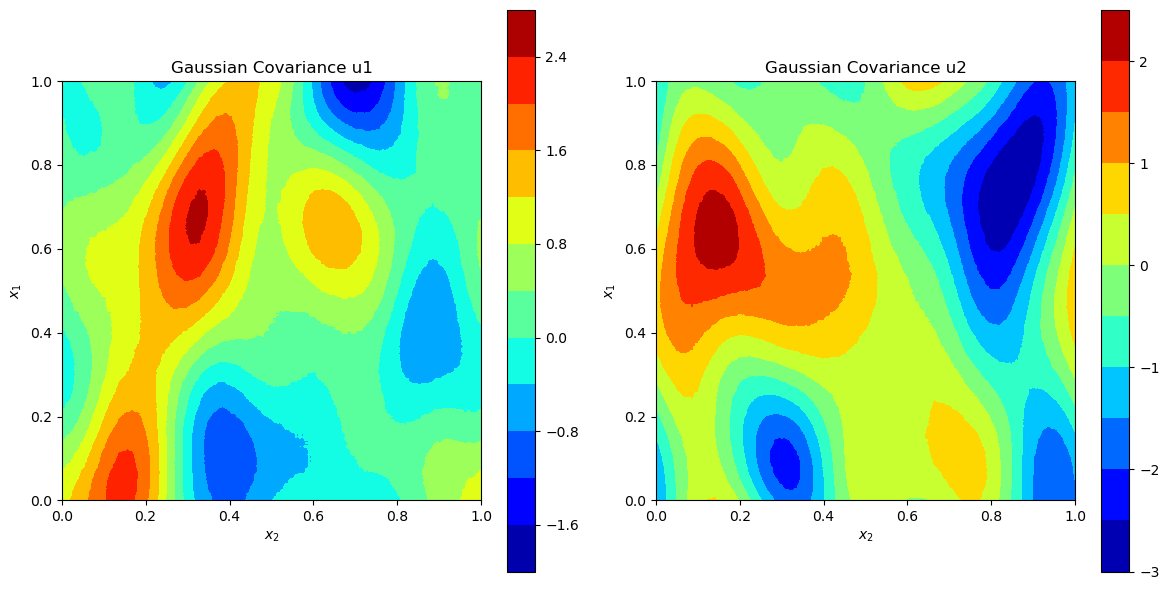

In [ ]:
fhandle=lambda x1,x2:gaussA_exp(x1,x2,10,10,0)
#
n1=257; n2=257; m1=0;m2=0; dx1=1/(n1-1); dx2=1/(n2-1)
C_red=Reduced_Cov(n1+m1,n2+m2,dx1,dx2,fhandle)
u1,u2 = Circulant_Embed_Approx_2d(C_red,n1,n2,m1,m2)
#
x=np.linspace(0,1,n1); y=np.linspace(0,1,n2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# 绘制 u1 的等高线图
CS1 = ax1.contourf(y, x, u1, 10, cmap='jet')
ax1.set_aspect('equal')  # 设置坐标轴等比例
ax1.set_xlabel(r'$x_2$')
ax1.set_ylabel(r'$x_1$')
ax1.set_title(r'Gaussian Covariance u1')
plt.colorbar(CS1, ax=ax1)


# 绘制 u2 的等高线图
CS2 = ax2.contourf(y, x, u2, 10, cmap='jet')
ax2.set_aspect('equal')  # 设置坐标轴等比例
ax2.set_xlabel(r'$x_2$')
ax2.set_ylabel(r'$x_1$')
ax2.set_title(r'Gaussian Covariance u2')
plt.colorbar(CS2, ax=ax2)

# 调整布局，防止重叠
plt.tight_layout()

# 显示图像
plt.show()

Then we take padding, m1 = 8n1, m2 = 8n2

rho(D_minus)=2.5052557312381932e-12


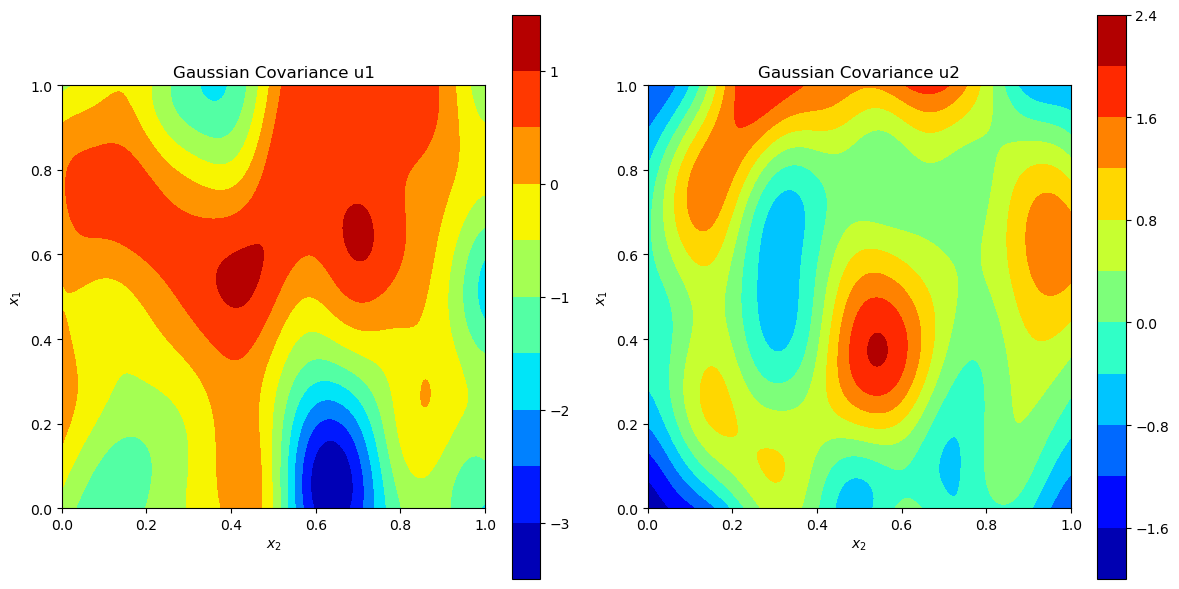

In [ ]:
fhandle=lambda x1,x2:gaussA_exp(x1,x2,10,10,0)
#
n1=257; n2=257; 
m1 = 8*n1; m2 = 8*n2; dx1=1/(n1-1); dx2=1/(n2-1)
C_red=Reduced_Cov(n1+m1,n2+m2,dx1,dx2,fhandle)
u1,u2 = Circulant_Embed_Approx_2d(C_red,n1,n2,m1,m2)
#
x=np.linspace(0,1,n1); y=np.linspace(0,1,n2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# 绘制 u1 的等高线图
CS1 = ax1.contourf(y, x, u1, 10, cmap='jet')
ax1.set_aspect('equal')  # 设置坐标轴等比例
ax1.set_xlabel(r'$x_2$')
ax1.set_ylabel(r'$x_1$')
ax1.set_title(r'Gaussian Covariance u1')
plt.colorbar(CS1, ax=ax1)

CS2 = ax2.contourf(y, x, u2, 10, cmap='jet')
ax2.set_aspect('equal')  # 设置坐标轴等比例
ax2.set_xlabel(r'$x_2$')
ax2.set_ylabel(r'$x_1$')
ax2.set_title(r'Gaussian Covariance u2')
plt.colorbar(CS2, ax=ax2)

# 调整布局，防止重叠
plt.tight_layout()
plt.show()

We find that the larger $\sigma$ is, the more rapitly c(x) decays, where sigma is $A = \sigma I$

rho(D_minus)=4.633562158481535e-14


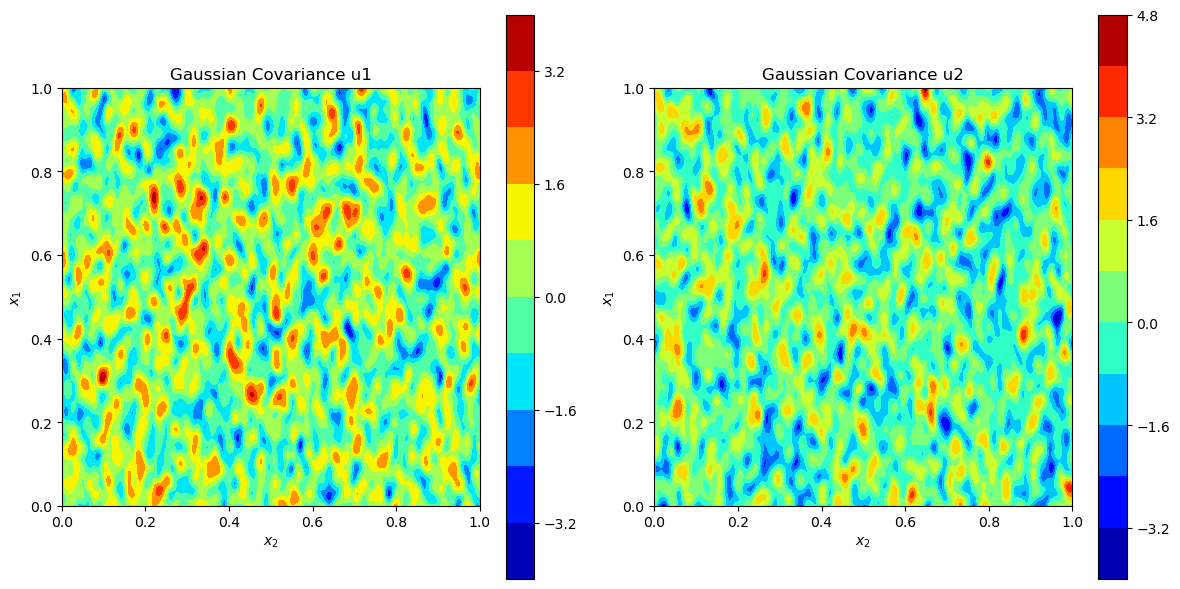

In [ ]:
fhandle = lambda x1,x2:gaussA_exp(x1,x2,1000,1000,0)
#
n1=257; n2=257; m1=0;m2=0; dx1=1/(n1-1); dx2=1/(n2-1)
C_red=Reduced_Cov(n1+m1,n2+m2,dx1,dx2,fhandle)
u1,u2 = Circulant_Embed_Approx_2d(C_red,n1,n2,m1,m2)
#
x=np.linspace(0,1,n1); y=np.linspace(0,1,n2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# 绘制 u1 的等高线图
CS1 = ax1.contourf(y, x, u1, 10, cmap='jet')
ax1.set_aspect('equal')  # 设置坐标轴等比例
ax1.set_xlabel(r'$x_2$')
ax1.set_ylabel(r'$x_1$')
ax1.set_title(r'Gaussian Covariance u1')
plt.colorbar(CS1, ax=ax1)


# 绘制 u2 的等高线图
CS2 = ax2.contourf(y, x, u2, 10, cmap='jet')
ax2.set_aspect('equal')  # 设置坐标轴等比例
ax2.set_xlabel(r'$x_2$')
ax2.set_ylabel(r'$x_1$')
ax2.set_title(r'Gaussian Covariance u2')
plt.colorbar(CS2, ax=ax2)

# 调整布局，防止重叠
plt.tight_layout()

# 显示图像

We have a test about 
$$A1 = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}$$
and
$$A2 = \begin{pmatrix}
1 & 0.8 \\
0.8 & 1
\end{pmatrix}$$
We find that A1 is isotropic and A2 is not.


rho(D_minus)=3.971735320164308e-13
rho(D_minus)=6.449539739288721e-13


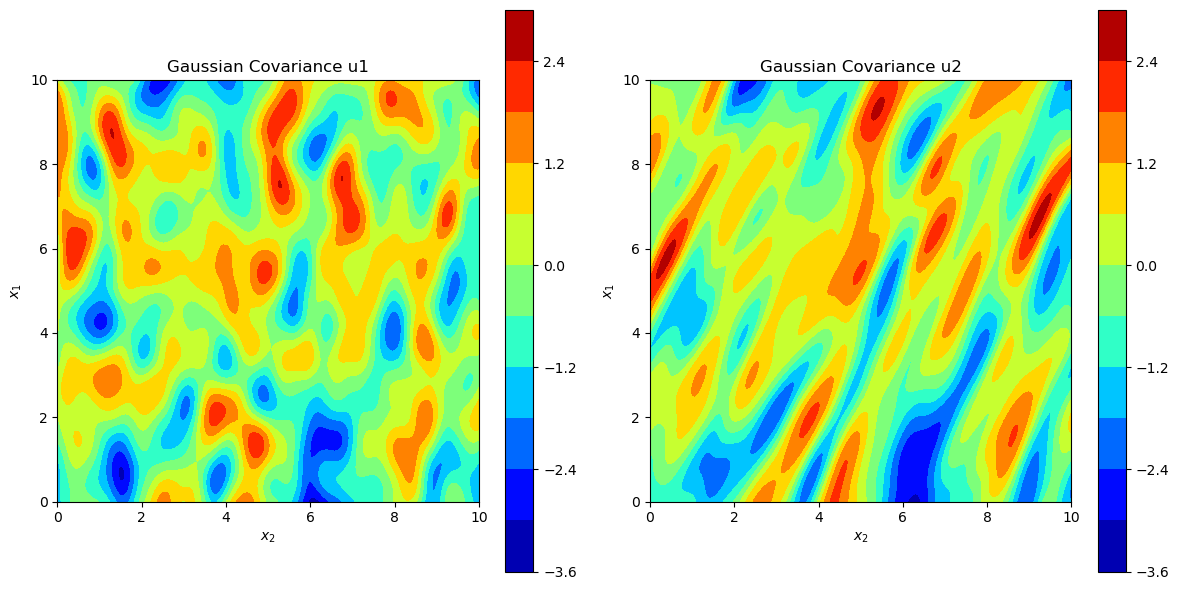

In [46]:
fhandle1=lambda x1,x2:gaussA_exp(x1,x2,1,1,0)
fhandle2=lambda x1,x2:gaussA_exp(x1,x2,1,1,0.8)
#
T = 10
n1=257; n2=257; m1=8*n1;m2=8*n2; 
dx1 = T/(n1-1); dx2 = T/(n2-1)
C_red1 = Reduced_Cov(n1+m1,n2+m2,dx1,dx2,fhandle1)
C_red2 = Reduced_Cov(n1+m1,n2+m2,dx1,dx2,fhandle2)
u1, _ = Circulant_Embed_Approx_2d(C_red1,n1,n2,m1,m2)
u2, _ = Circulant_Embed_Approx_2d(C_red2,n1,n2,m1,m2)
#
x = np.linspace(0, T, n1); y = np.linspace(0, T, n2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# 绘制 u1 的等高线图
CS1 = ax1.contourf(y, x, u1, 10, cmap='jet')
ax1.set_aspect('equal')  # 设置坐标轴等比例
ax1.set_xlabel(r'$x_2$')
ax1.set_ylabel(r'$x_1$')
ax1.set_title(r'Gaussian Covariance u1')
plt.colorbar(CS1, ax=ax1)


# 绘制 u2 的等高线图
CS2 = ax2.contourf(y, x, u2, 10, cmap='jet')
ax2.set_aspect('equal')  # 设置坐标轴等比例
ax2.set_xlabel(r'$x_2$')
ax2.set_ylabel(r'$x_1$')
ax2.set_title(r'Gaussian Covariance u2')
plt.colorbar(CS2, ax=ax2)

# 调整布局，防止重叠
plt.tight_layout()

# 显示图像

Isotropic Gaussian random field: Turning bands method.

KL expansion of random field

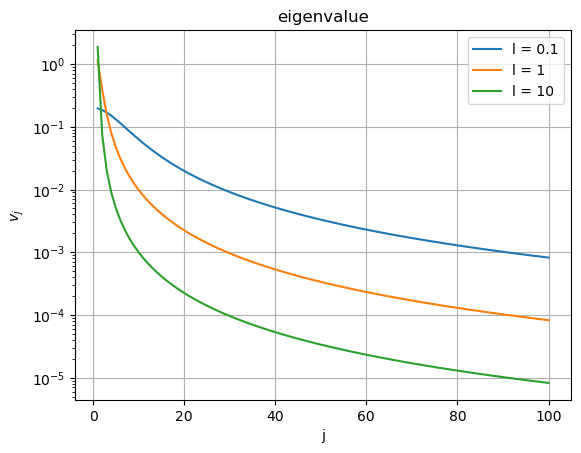

In [ ]:
from scipy.optimize import root_scalar

def f_odd(w, l, a):
    return l**(-1) * np.cos(w * a) - w * np.sin(w * a)

def f_even(w, l, a):
    return l**(-1) * np.sin(w * a) + w * np.cos(w * a)

def root_w(n, l, a):
    roots = []
    for i in range(1,n+1):
        if i%2 == 0:
            f = lambda x: f_even(x, l, a)
        else:
            f = lambda x: f_odd(x, l, a)
        left = (i - 1) * np.pi/2
        right = i * np.pi/2
        try:
            result = root_scalar(f, bracket=[left, right], method='brentq')
            if result.converged:
                roots.append(result.root)
        except ValueError:
            print(f'{left}and{right}error')
            pass
    return np.array(roots)

def eigen_v(w, l):
    return 2*l**(-1) / (w**2 + l**(-2))

l = [0.1, 1, 10]
a = 1
N = 100
for i in range(len(l)):
    w = root_w(N, l[i], a)
    v = eigen_v(w, l[i])
    plt.plot(range(1,101), v, label = f'l = {l[i]}')
plt.title("eigenvalue")
plt.xlabel("j")
plt.ylabel(r'$v_j$'); plt.yscale("log") 
plt.legend()
plt.grid(True)
plt.show()

Then we plot hte eigenfunction of exponenetial covariance when l=1

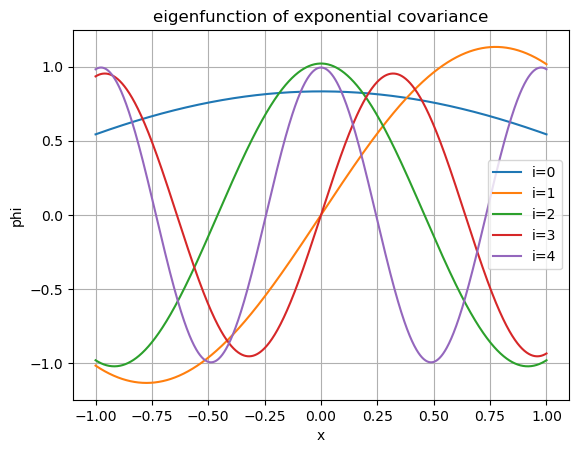

In [ ]:
a = 1
N = 100
w = root_w(N, 1, a)
def phi(x, i, w, a):
    w = w[i]
    if i%2 == 0:
        coe = 1/sqrt(a + np.sin(w**a)/(2*w))
        return coe * np.cos(w * x)
    else:
        coe = 1/sqrt(a - np.sin(w**a)/(2*w))
        return coe * np.sin(w * x)

x = np.linspace(-a, a, 1000)
for i in range(5):
    y = phi(x, i, w, a)
    plt.plot(x, y, label=f'i={i}')
plt.title("eigenfunction of exponential covariance")
plt.xlabel("x")
plt.ylabel("phi")
plt.legend()
plt.grid(True)
plt.show()

Use DKL to approximate random field, if the eigenpairs are provided.

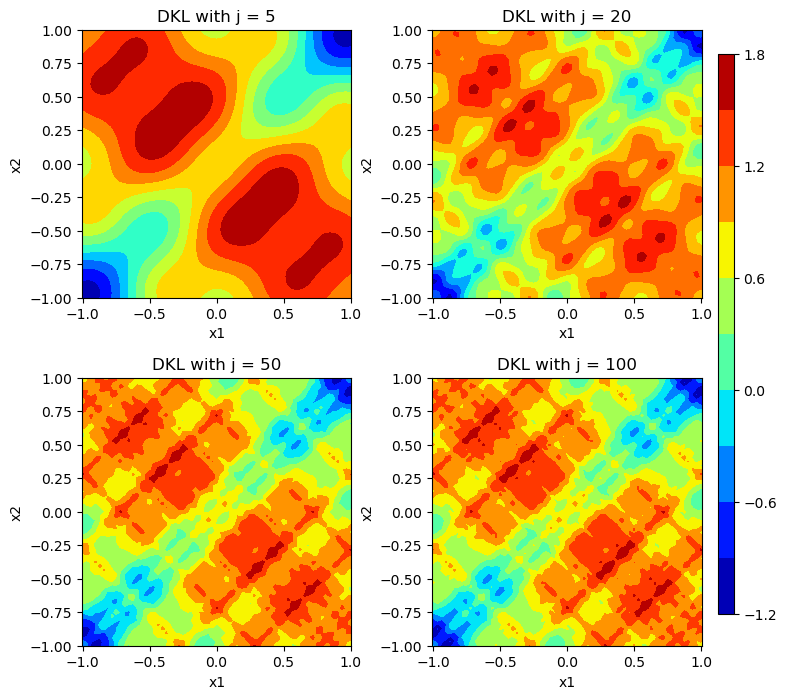

In [116]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
def Exponential_RF_KL(grid, J, l, a):
    w = root_w(J, l, a)
    v = eigen_v(w, l)
    x1 = grid[:, 0]; x2 = grid[:, 1]
    np.random.seed(24)
    xi = np.random.randn(J)
    Phi = []
    for i in range(J):
        phix1 = phi(x1, i, w, a)
        phix2 = phi(x2, i, w, a)
        Phi.append(phix1 * phix2)
    Phi = np.array(Phi).T
    return np.sum(Phi * v**(0.5) * xi, 1)

N = 65
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
Grid = np.column_stack([X.ravel(), Y.ravel()])
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.3)

J = [5, 20, 50, 100] 

# 迭代创建 2x2 的子图
for idx, j in enumerate(J):
    ax = fig.add_subplot(gs[idx])
    u = Exponential_RF_KL(Grid, j, 1, 1)
    u = u.reshape(N, N)
    CS = ax.contourf(X, Y, u, 10, cmap='jet')
    ax.set_title(f"DKL with j = {j}")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.axis('equal')

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
fig.colorbar(CS, cax=cbar_ax)

plt.show()
#
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, u, cmap='viridis')
# ax.set_title("3D Surface Plot")
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
# plt.show()

#
